In [1]:
import sklearn
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('./features_with_labels.csv')
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var,label
0,0.618634,0.060441,0.088145,0.019022,1444.324663,114477.653937,2235.923589,63488.615540,4729.447978,1.309743e+06,...,25.922461,19.311626,25.342932,18.112381,16.330214,15.490397,30.166121,14.229066,14.040447,Adelante
1,0.560345,0.073903,0.062258,0.003491,1521.514985,187696.919884,2248.374280,19503.939968,4810.592404,6.059810e+05,...,27.512997,17.614613,21.384708,30.434793,20.627022,15.136580,20.304989,15.323487,13.381853,Adelante
2,0.597341,0.063547,0.056284,0.003454,1516.616140,169062.782871,2269.242537,18068.028170,4905.745883,4.304342e+05,...,15.875969,30.379902,33.232044,23.119535,21.458532,11.998669,15.320440,12.827284,13.437700,Adelante
3,0.583311,0.063736,0.055072,0.002713,1420.249276,62669.818177,2234.228988,12975.282416,4771.142578,3.359522e+05,...,19.116392,13.576414,15.970752,28.311836,15.171912,10.332423,13.521936,9.779466,9.492474,Adelante
4,0.604088,0.060307,0.056637,0.003253,1412.560291,82354.578046,2229.828311,15885.536854,4707.457506,4.540211e+05,...,13.222724,11.541191,24.046785,29.364592,13.599319,12.159279,17.400167,7.714384,10.112505,Adelante


In [3]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=UserWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    
    # Naive Bayes
    nb = GaussianNB()
    model_assess(nb, "Naive Bayes")

    # Stochastic Gradient Descent
    sgd = SGDClassifier(max_iter=5000, random_state=0)
    model_assess(sgd, "Stochastic Gradient Descent")

    # KNN
    knn = KNeighborsClassifier(n_neighbors=19)
    model_assess(knn, "KNN")

    # Decission trees
    tree = DecisionTreeClassifier()
    model_assess(tree, "Decission trees")

    # Random Forest
    rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
    model_assess(rforest, "Random Forest")

    # Support Vector Machine
    svm = SVC(decision_function_shape="ovo")
    model_assess(svm, "Support Vector Machine")

    # Logistic Regression
    lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    model_assess(lg, "Logistic Regression")

    # Neural Nets
    nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
    model_assess(nn, "Neural Nets")

    # Cross Gradient Booster
    xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
    model_assess(xgb, "Cross Gradient Booster")

    # Cross Gradient Booster (Random Forest)
    xgbrf = XGBRFClassifier(objective= 'multi:softmax')
    model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.69907 

Accuracy Stochastic Gradient Descent : 0.81481 

Accuracy KNN : 0.62037 

Accuracy Decission trees : 0.75926 

Accuracy Random Forest : 0.93981 

Accuracy Support Vector Machine : 0.86574 

Accuracy Logistic Regression : 0.85185 

Accuracy Neural Nets : 0.89815 

[12:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.91667 

[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster (Rand

Accuracy : 0.93981 



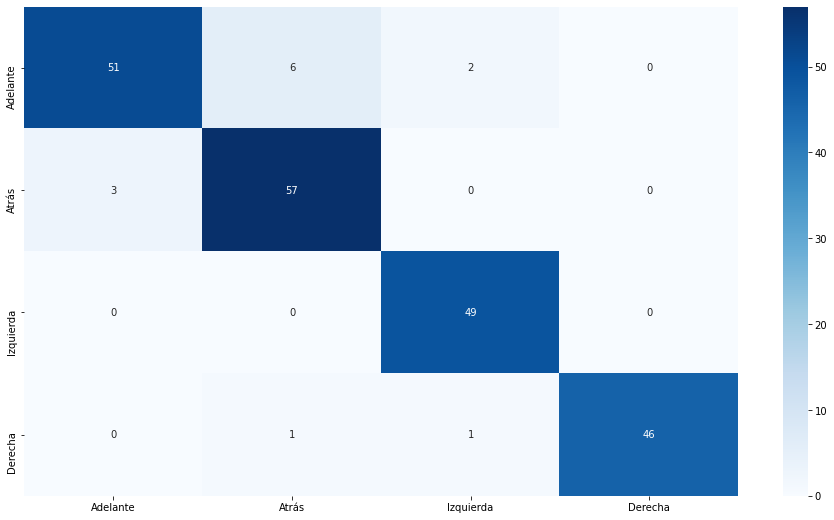

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Final model
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)

# Guardar el modelo en un archivo
model_filename = 'random_forest_model.pkl'
joblib.dump(rforest, model_filename)

preds = rforest.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["Adelante", "Atrás", "Izquierda", "Derecha"],
            yticklabels = ["Adelante", "Atrás", "Izquierda", "Derecha"]);

In [8]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=rforest, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1389 ± 0.0219,mfcc4_var
0.0222 ± 0.0159,harmony_var
0.0213 ± 0.0074,mfcc5_var
0.0167 ± 0.0172,mfcc9_var
0.0157 ± 0.0045,mfcc12_mean
0.0093 ± 0.0000,mfcc11_mean
0.0093 ± 0.0083,mfcc19_var
0.0083 ± 0.0148,mfcc15_mean
0.0083 ± 0.0037,tempo
0.0074 ± 0.0094,mfcc7_var
